In [2]:
import xarray as xr
import pygrib

In [3]:
data = pygrib.open("grib-data/fnl_20221013_06_00.grib2")

In [9]:
grb = data.select()[0]
var = grb.values

In [10]:
var

array([[101355.8125, 101355.8125, 101355.8125, ..., 101355.8125,
        101355.8125, 101355.8125],
       [101368.6125, 101369.4125, 101370.2125, ..., 101366.2125,
        101367.2125, 101367.8125],
       [101373.2125, 101373.6125, 101374.2125, ..., 101371.8125,
        101372.2125, 101372.8125],
       ...,
       [100912.0125, 100905.6125, 100900.0125, ..., 100891.6125,
        100901.8125, 100912.2125],
       [100991.0125, 100991.6125, 100994.2125, ..., 100988.4125,
        100989.4125, 100990.2125],
       [101145.2125, 101145.2125, 101145.2125, ..., 101145.2125,
        101145.2125, 101145.2125]])

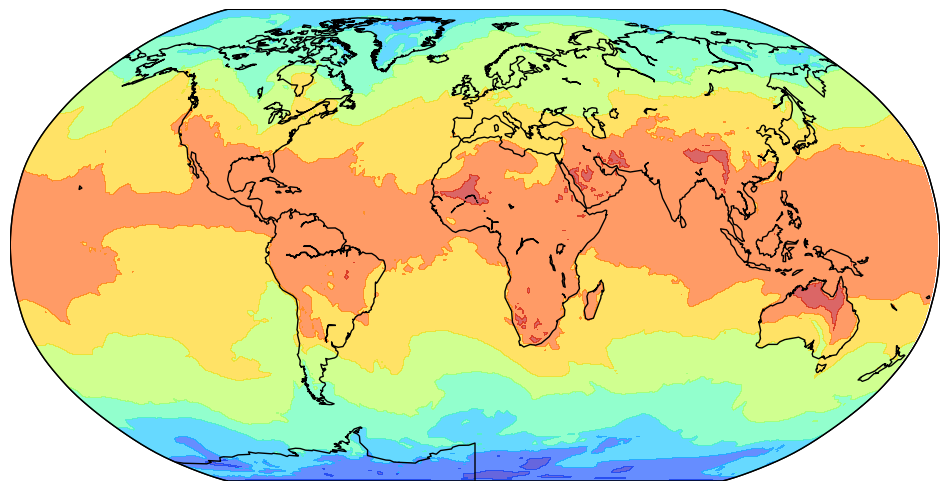

In [2]:
import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np
 
plt.figure(figsize=(12,8))
 
grib = "grib-data/fnl_20221013_06_00.grib2" # Set the file name of your input GRIB file
grbs = pygrib.open(grib)
 
grb = grbs.select()[509]
data = grb.values
 
# need to shift data grid longitudes from (0..360) to (-180..180)
lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )
lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
data, lons = shiftgrid(180., data, lons, start=False)
grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
 
m = Basemap(projection='robin', lon_0=0)
 
x, y = m(grid_lon, grid_lat)
 

m.contourf(grid_lon, grid_lat, data-273.15, latlon=True, cmap="jet", alpha=0.6)

m.drawcoastlines()
m.drawmapboundary()

In [3]:
data2 = xr.open_dataset("initial_condition.nc")

In [66]:
data2.TG0[-1]

<xarray.DataArray 'TG0' (latitude: 32, longitude: 64)>
array([[197.098862, 197.070591, 197.13213 , ..., 196.553345, 196.706032,
        196.985928],
       [199.155782, 199.662511, 199.67188 , ..., 197.918522, 198.03229 ,
        198.439387],
       [204.091682, 205.739363, 205.909207, ..., 200.629932, 202.217257,
        203.080226],
       ...,
       [208.552532, 208.694851, 209.131595, ..., 209.698832, 209.226895,
        209.292201],
       [209.205952, 209.723532, 210.33503 , ..., 208.547407, 209.475557,
        209.407123],
       [210.482632, 210.587005, 210.73012 , ..., 210.158458, 210.236532,
        210.382506]])
Coordinates:
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float64 -85.76 -80.27 -74.75 ... 74.75 80.27 85.76
    level      float64 925.0

In [42]:
data2.TG0[0]-273.15

<xarray.DataArray 'TG0' (latitude: 32, longitude: 64)>
array([[-32.54296109, -33.25470859, -33.83057359, ..., -29.25117484,
        -30.37918609, -31.57309234],
       [-28.14696109, -28.85377359, -30.12082109, ..., -22.96938859,
        -25.58387609, -27.07171609],
       [-23.52802109, -27.67179609, -28.04413359, ..., -17.54308984,
        -14.90370859, -17.39405859],
       ...,
       [ -3.05597109,  -2.43229609,  -0.95012109, ...,  -6.47393984,
         -3.30362109,  -2.41348359],
       [ -7.91315109,  -6.40537109,  -5.99826359, ..., -13.71853984,
        -10.33725859,  -8.74438609],
       [-11.80069109, -11.68964484, -11.55932359, ..., -12.20382234,
        -12.05424609, -11.97244484]])
Coordinates:
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float64 -85.76 -80.27 -74.75 ... 74.75 80.27 85.76
    level      float64 30.0

In [46]:
data2.longitude

<xarray.DataArray 'longitude' (longitude: 64)>
array([  0.   ,   5.625,  11.25 ,  16.875,  22.5  ,  28.125,  33.75 ,  39.375,
        45.   ,  50.625,  56.25 ,  61.875,  67.5  ,  73.125,  78.75 ,  84.375,
        90.   ,  95.625, 101.25 , 106.875, 112.5  , 118.125, 123.75 , 129.375,
       135.   , 140.625, 146.25 , 151.875, 157.5  , 163.125, 168.75 , 174.375,
       180.   , 185.625, 191.25 , 196.875, 202.5  , 208.125, 213.75 , 219.375,
       225.   , 230.625, 236.25 , 241.875, 247.5  , 253.125, 258.75 , 264.375,
       270.   , 275.625, 281.25 , 286.875, 292.5  , 298.125, 303.75 , 309.375,
       315.   , 320.625, 326.25 , 331.875, 337.5  , 343.125, 348.75 , 354.375])
Coordinates:
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4

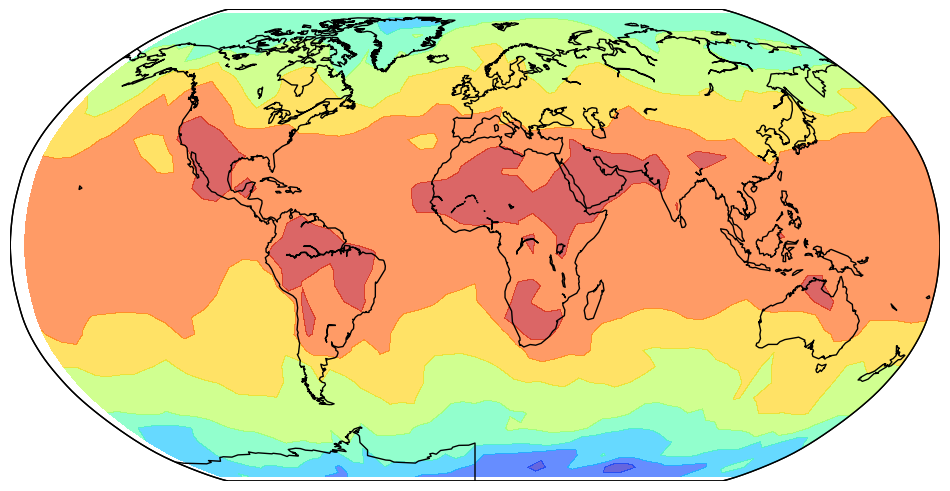

In [7]:
import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np
 
plt.figure(figsize=(12,8))
 

data = data2.TG0[-1]-273.15
 

grid_lon, grid_lat = np.meshgrid(data2.longitude, data2.latitude) #regularly spaced 2D grid
 
m = Basemap(projection='robin', lon_0=0)
 
x, y = m(grid_lon, grid_lat)
 

m.contourf(grid_lon, grid_lat, data-273.15, latlon=True, cmap="jet", alpha=0.6)

m.drawcoastlines()
m.drawmapboundary()

In [67]:
data.close()

In [14]:
sin_data = np.random.rand(181,360)

In [34]:
grbs.select()[509]

510:Temperature:K (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202210130600